<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/01_PROJ_Unicorn_March2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unicorns**
Analisando base de dados de startups que viraram unicornios (+ US$ 1 Bi)

# Montando o drive e importando bibliotecas

## Caminho do arquivo

In [ ]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/recursos/Startups+in+2021+end.csv'

## Bibliotecas importadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Impressao incial

## Lendo e abrindo a base

In [ ]:
df = pd.read_csv(csv_path).sort_values(by=['Valuation ($B)'], ascending = False)

In [ ]:
df.sample(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
717,717,Vox Media,$1,8/12/2015,United States,Washington,Internet software & services,"Accel Partners, Comcast Ventures, General Atla..."
760,760,REEF Technology,$1,12/10/2018,United States,Miami,"Supply chain, logistics, & delivery","Target Global, UBS Asset Management, Mubadala ..."
712,712,BeiBei,$1,1/22/2015,China,Hangzhou,E-commerce & direct-to-consumer,"Banyan Capital, New Horizon Capital, IDG Capit..."
704,704,OrCam Technologies,$1.03,2/20/2018,Israel,Jerusalem,Artificial intelligence,"Intel Capital, Aviv Venture Capital"
192,192,HyalRoute,$3.5,5/26/2020,Singapore,NaN,Mobile & telecommunications,Kuang-Chi


# Discutindo sobre possíveis perguntas e respostas sobre essa base

O que temos:


1.   Nome da compania
2.   Valuation
3.   Início
4.   País
5.   Cidade
6.   Tipo de atividade
7.   Investidores

Perguntas possíveis iniciais:
* Gere um gráfico que mostre a velocidade com a qual as top 10 mais rápidas cresceram e as top últimas cresceram.

* Qual é a distribuição por país desses unicórnios?

* Qual o tipo de atividade desses unicórnios?

Transformações necessárias antes de gerar informação útil:
* Verificar qualidade dos dados
* verificar tipo dos dados

# Qualidade dos dados

In [ ]:
# verficar o shape: linhas e colunas
df.shape

(936, 8)

In [ ]:
# verificando tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 2 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 65.8+ KB


## Observações dos tipos de dados
1. O valuation deve ter o sifrão ($) retirado para então transformar esse campo em float
2. Date Joined deve ser trasnformado para virar DateTime
3. Coluna 'Unnamed: 0' deve ser retirada pois coincide com o próprio index. Então o index já pode ser o id da coluna nesse cenário simples.

## Avaliar valores nulos

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,15
Industry,0
Select Investors,1


<Axes: title={'center': 'Analisando os campos nulos'}>

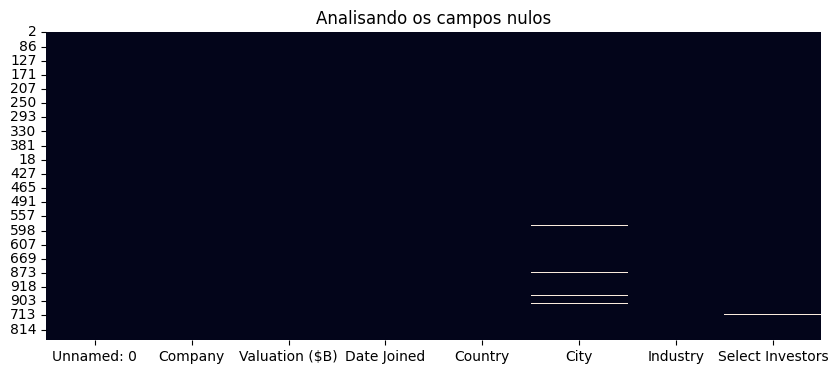

In [ ]:
# visao gráfica
plt.figure( figsize=(10,4) )
plt.title('Analisando os campos nulos')
sns.heatmap( df.isnull(), cbar=False )

## Avaliando campos unicos

In [ ]:
df.nunique()

,0
Unnamed: 0,936
Company,935
Valuation ($B),192
Date Joined,589
Country,47
City,239
Industry,17
Select Investors,920


## Explorando o campo Industry

In [ ]:
df['Industry'].unique()

array(['Fintech', 'Travel', 'Internet software & services', 'Other',
       'Cybersecurity', 'E-commerce & direct-to-consumer',
       'Mobile & telecommunications', 'Auto & transportation', 'Health',
       'Artificial intelligence', 'Hardware', 'Consumer & retail',
       'Data management & analytics',
       'Supply chain, logistics, & delivery', 'Edtech', 'Finttech',
       'Artificial Intelligence'], dtype=object)

In [ ]:
# respondendo qual é o setor mais comum
df['Industry'].value_counts()

,count
Industry,
Fintech,190
Internet software & services,167
E-commerce & direct-to-consumer,102
Artificial intelligence,69
Health,63
Other,51
"Supply chain, logistics, & delivery",51
Cybersecurity,41
Mobile & telecommunications,37


In [ ]:
# respondendo qual é o setor mais comum em porcentagem
df['Industry'].value_counts( normalize = True)

,proportion
Industry,
Fintech,0.202991
Internet software & services,0.178419
E-commerce & direct-to-consumer,0.108974
Artificial intelligence,0.073718
Health,0.067308
Other,0.054487
"Supply chain, logistics, & delivery",0.054487
Cybersecurity,0.043803
Mobile & telecommunications,0.039530
